In [18]:
import os, time
from glob import iglob
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
rootdir_glob = 'D:/**/*' # where my backup drive is mounted

# loop through the files in the drive and their names, create date, and size in bytes
file_list = [[f, time.ctime(os.stat(f).st_mtime), 
              os.stat(f).st_size] for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]
file_list

[['D:/Autorun.inf', 'Mon Jul 16 18:33:00 2012', 32],
 ['D:/BackupPlus.ico', 'Wed Aug 14 17:40:40 2013', 562718],
 ['D:/MediaID.bin', 'Tue Jun 23 22:35:51 2015', 528],
 ['D:/Seagate Dashboard Installer.dmg', 'Thu Sep 11 22:04:33 2014', 151297217],
 ['D:/Seagate Dashboard Installer.exe', 'Wed Sep 17 04:40:59 2014', 147413592],
 ['D:/Warranty.pdf', 'Fri Aug 23 12:37:46 2013', 1114848],
 ['D:/data_files_backup\\Verizon-Bill-10-26-2014.pdf',
  'Wed Dec 31 22:58:41 2014',
  132902],
 ['D:/data_files_backup\\Verizon-Bill-11-26-2014.pdf',
  'Wed Dec 31 22:44:18 2014',
  130756],
 ['D:/data_files_backup\\Verizon-Bill-12-26-2014.pdf',
  'Wed Dec 31 22:41:53 2014',
  135536],
 ['D:/data_files_backup\\development\\mvc_auth_script.sql',
  'Wed May  1 22:22:47 2013',
  1917],
 ['D:/data_files_backup\\development\\aws\\notes.txt',
  'Tue Jul  7 23:03:16 2015',
  603],
 ['D:/data_files_backup\\development\\aws\\TargetTheThingAWSKey.pem',
  'Tue Jul  7 22:51:09 2015',
  1696],
 ['D:/data_files_backup\\

In [15]:
df_files = pd.DataFrame(file_list, columns=['file_name', 'create_datetime', 'size_bytes'])

df_files['create_datetime'] = pd.to_datetime(df_files.create_datetime)  # cast this column to datetime
df_files['create_date'] = df_files.create_datetime.dt.date  # get just the date part of the timestamp

df_files.head()

,file_name,create_datetime,size_bytes,create_date
0,D:/Autorun.inf,2012-07-16 18:33:00,32,2012-07-16
1,D:/BackupPlus.ico,2013-08-14 17:40:40,562718,2013-08-14
2,D:/MediaID.bin,2015-06-23 22:35:51,528,2015-06-23
3,D:/Seagate Dashboard Installer.dmg,2014-09-11 22:04:33,151297217,2014-09-11
4,D:/Seagate Dashboard Installer.exe,2014-09-17 04:40:59,147413592,2014-09-17


In [20]:
def convert_filesize(size, desired_uom):
    uom_options = ['B', 'KB', 'MB', 'GB', 'TB']
    supplied_uom = re.search(r'[a-zA-Z]+', size)
    if supplied_uom:
        supplied_uom = supplied_uom.group()
    else:
        raise ValueError('size argument did not contain expected unit of measure')
        
    supplied_size = float(size.replace(supplied_uom, ''))
    supplied_size_in_bytes = supplied_size * (1024 ** (uom_options.index(supplied_uom)))
    converted_size = supplied_size_in_bytes / (1024 ** (uom_options.index(desired_uom)))
    return converted_size, '{0:,.2f} {1}'.format(converted_size, desired_uom)

df_files['size_gb'] = df_files.size_bytes.apply(lambda s: convert_filesize('{0} B'.format(s), 'GB')[0]).astype('float')
df_files.head()

,file_name,create_datetime,size_bytes,create_date,size_gb
0,D:/Autorun.inf,2012-07-16 18:33:00,32,2012-07-16,2.980232e-08
1,D:/BackupPlus.ico,2013-08-14 17:40:40,562718,2013-08-14,5.240720e-04
2,D:/MediaID.bin,2015-06-23 22:35:51,528,2015-06-23,4.917383e-07
3,D:/Seagate Dashboard Installer.dmg,2014-09-11 22:04:33,151297217,2014-09-11,1.409065e-01
4,D:/Seagate Dashboard Installer.exe,2014-09-17 04:40:59,147413592,2014-09-17,1.372896e-01


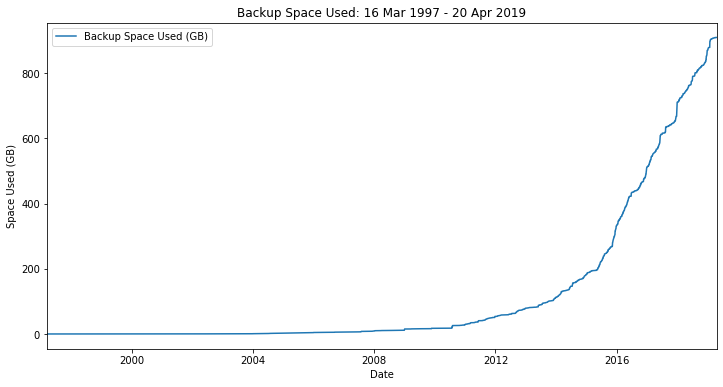

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

df_growth = df_files[['create_date', 'size_gb']].sort_values('create_date').groupby('create_date').sum()
df_growth['Backup Space Used (GB)'] = df_growth.size_gb.cumsum()

_ = df_growth[['Backup Space Used (GB)']].plot(ax=ax)
_ = ax.set_title('Backup Space Used: {0:%d %b %Y} - {1:%d %b %Y}'.format(df_growth.index[0], 
                                                                         df_growth.index[-1]))
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Space Used (GB)')

In [ ]:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [ ]:
avg_daily_growth = df.set_index('date_col')[['used_disk']].diff().mean().values[0]
total_capacity = 100  # get total disk capacity here

growth_space = np.arange(df.used_disk[0], total_capacity, avg_daily_growth)
growth_index = pd.to_datetime(np.arange(0, len(growth_space)), unit='D', origin=df.date_col[0])

df_growth = pd.DataFrame(growth_space, columns=['Disk Used'], index=growth_index)